In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")  # Ignore all warnings

In [35]:
pip install statsmodels 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 46.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 40.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 46.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 33.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.7/163.7 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 51.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.0/322.0 kB 29.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 50.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.9/106.9 kB 14.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 51.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 37.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.3/615.3 MB 13.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 3.5 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 51.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 57.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 55.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.6/316.6 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.2 MB/s eta 0:00:00a 0

In [3]:
# Load the merged dataset
data = pd.read_csv('ridership_and_weather_data_combined_2018_to_2023.csv')

# Display the first few rows to verify the data
print(data.head())

         date  hour Origin Station Destination Station  Number of Exits  Year  \
0  2018-01-01     0           12TH                12TH                3  2018   
1  2018-01-01     0           12TH                16TH                1  2018   
2  2018-01-01     0           12TH                BAYF                1  2018   
3  2018-01-01     0           12TH                CAST                3  2018   
4  2018-01-01     0           12TH                CIVC                2  2018   

    county  temperature_2m  precipitation  weather_code  wind_speed_10m  \
0  Alameda             9.0            0.0             1             6.2   
1  Alameda             9.0            0.0             1             6.2   
2  Alameda             9.0            0.0             1             6.2   
3  Alameda             9.0            0.0             1             6.2   
4  Alameda             9.0            0.0             1             6.2   

   wind_direction_10m  relative_humidity_2m weather_category  

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49687580 entries, 0 to 49687579
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   date                  object 
 1   hour                  int64  
 2   Origin Station        object 
 3   Destination Station   object 
 4   Number of Exits       int64  
 5   Year                  int64  
 6   county                object 
 7   temperature_2m        float64
 8   precipitation         float64
 9   weather_code          int64  
 10  wind_speed_10m        float64
 11  wind_direction_10m    int64  
 12  relative_humidity_2m  int64  
 13  weather_category      object 
 14  holiday_name          object 
 15  is_holiday            int64  
dtypes: float64(3), int64(7), object(6)
memory usage: 5.9+ GB


In [4]:
data['date'] = pd.to_datetime(data['date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49687580 entries, 0 to 49687579
Data columns (total 16 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   hour                  int64         
 2   Origin Station        object        
 3   Destination Station   object        
 4   Number of Exits       int64         
 5   Year                  int64         
 6   county                object        
 7   temperature_2m        float64       
 8   precipitation         float64       
 9   weather_code          int64         
 10  wind_speed_10m        float64       
 11  wind_direction_10m    int64         
 12  relative_humidity_2m  int64         
 13  weather_category      object        
 14  holiday_name          object        
 15  is_holiday            int64         
dtypes: datetime64[ns](1), float64(3), int64(7), object(5)
memory usage: 5.9+ GB


In [15]:
data.describe()

,date,hour,Number of Exits,Year,temperature_2m,precipitation,weather_code,wind_speed_10m,wind_direction_10m,relative_humidity_2m,is_holiday
count,49687580,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07,4.968758e+07
mean,2020-11-16 03:26:23.571428096,1.364799e+01,7.781220e+00,2.020374e+03,1.457545e+01,6.530444e-02,5.174661e+00,1.637376e+01,2.173586e+02,7.401827e+01,2.159322e-02
min,2018-01-01 00:00:00,0.000000e+00,1.000000e+00,2.018000e+03,-1.600000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
25%,2019-03-21 00:00:00,9.000000e+00,1.000000e+00,2.019000e+03,1.160000e+01,0.000000e+00,0.000000e+00,9.400000e+00,1.950000e+02,6.500000e+01,0.000000e+00
50%,2020-10-02 00:00:00,1.400000e+01,2.000000e+00,2.020000e+03,1.420000e+01,0.000000e+00,1.000000e+00,1.530000e+01,2.430000e+02,7.800000e+01,0.000000e+00
75%,2022-07-25 00:00:00,1.800000e+01,6.000000e+00,2.022000e+03,1.680000e+01,0.000000e+00,2.000000e+00,2.250000e+01,2.650000e+02,8.600000e+01,0.000000e+00
max,2023-12-31 00:00:00,2.300000e+01,1.165000e+03,2.023000e+03,4.640000e+01,1.980000e+01,7.500000e+01,6.750000e+01,3.600000e+02,1.000000e+02,1.000000e+00
std,NaN,5.305687e+00,2.269393e+01,1.804882e+00,4.481007e+00,4.012927e-01,1.452017e+01,8.687006e+00,8.329236e+01,1.685046e+01,1.453511e-01


In [16]:
data.isnull().sum()

date                           0
hour                           0
Origin Station                 0
Destination Station            0
Number of Exits                0
Year                           0
county                         0
temperature_2m                 0
precipitation                  0
weather_code                   0
wind_speed_10m                 0
wind_direction_10m             0
relative_humidity_2m           0
weather_category               0
holiday_name            48614665
is_holiday                     0
dtype: int64

In [5]:
# Replace NaN values with 'No Holiday' in the holiday_name column
data['holiday_name'].fillna('No Holiday', inplace=True)

In [18]:
data.isnull().sum()

date                    0
hour                    0
Origin Station          0
Destination Station     0
Number of Exits         0
Year                    0
county                  0
temperature_2m          0
precipitation           0
weather_code            0
wind_speed_10m          0
wind_direction_10m      0
relative_humidity_2m    0
weather_category        0
holiday_name            0
is_holiday              0
dtype: int64

##  Ridership Over Time (Daily Aggregation)

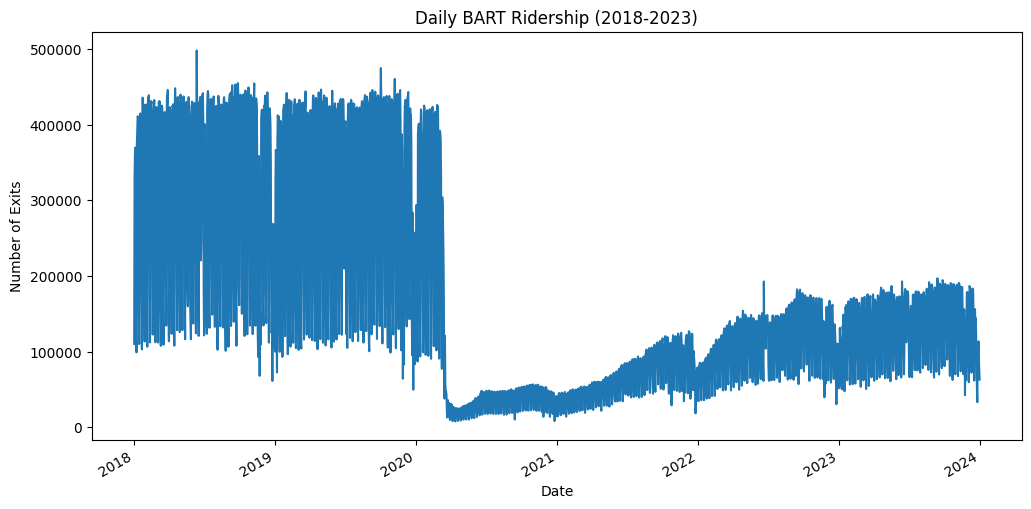

In [6]:
# Aggregate ridership data by date
daily_ridership = data.groupby('date')['Number of Exits'].sum()

# Plot the daily ridership trend
plt.figure(figsize=(12, 6))
daily_ridership.plot()
plt.title('Daily BART Ridership (2018-2023)')
plt.xlabel('Date')
plt.ylabel('Number of Exits')
plt.show()

## Rolling Average of Ridership Over Time

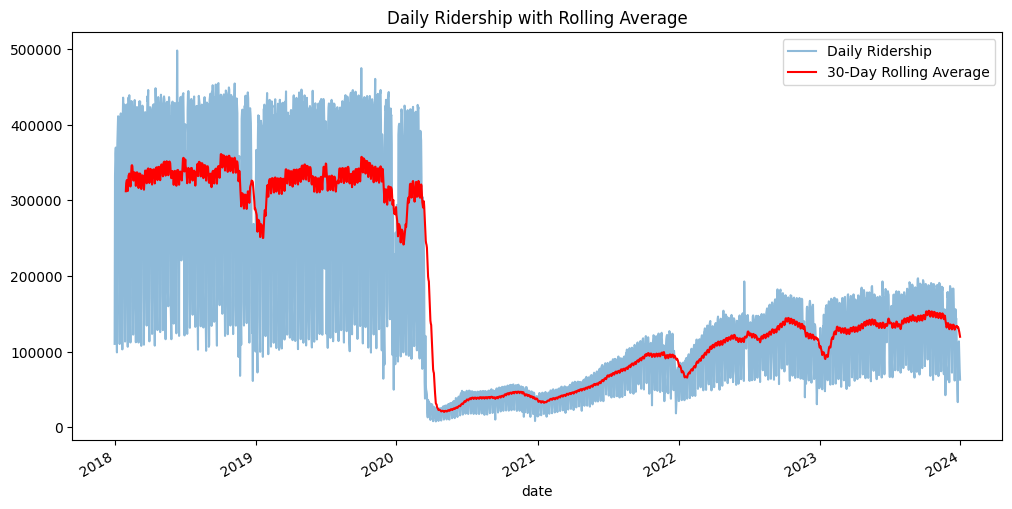

In [7]:
daily_ridership = data.groupby('date')['Number of Exits'].sum()
daily_ridership_rolling = daily_ridership.rolling(window=30).mean()  # 30-day rolling average

plt.figure(figsize=(12, 6))
daily_ridership.plot(alpha=0.5, label='Daily Ridership')
daily_ridership_rolling.plot(label='30-Day Rolling Average', color='red')
plt.legend()
plt.title('Daily Ridership with Rolling Average')
plt.show()


**Daily Ridership with Rolling Average:**

The 30-day rolling average smooths out daily fluctuations and highlights broader trends, especially the significant drop in ridership during 2020 (likely due to COVID-19).
It also reveals the gradual recovery of ridership over time, helping to forecast future demand based on long-term trends.

## Hourly Trends (By Weekday and Hour)

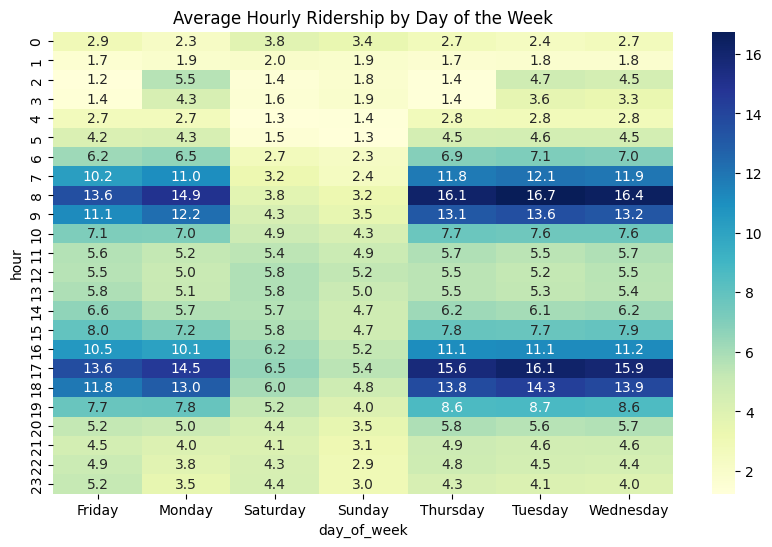

In [8]:
# Create pivot table for ridership by hour and day of the week
data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()
hourly_trends = data.pivot_table(values='Number of Exits', 
                                 index='hour', columns='day_of_week', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(hourly_trends, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Average Hourly Ridership by Day of the Week')
plt.show()

# Analysis of weather impact

## Ridership vs. Temperature

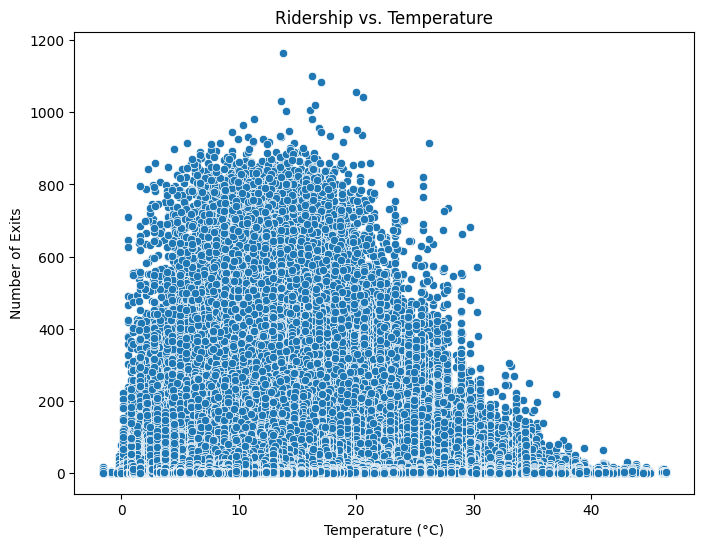

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temperature_2m', y='Number of Exits', data=data)
plt.title('Ridership vs. Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Exits')
plt.show()

## Ridership on Holidays vs. Non-Holidays

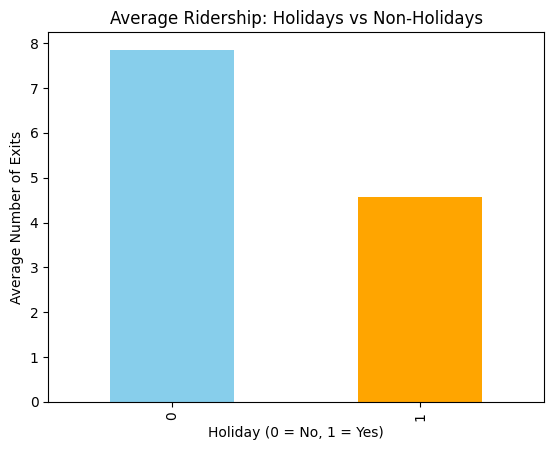

In [10]:
holiday_ridership = data.groupby('is_holiday')['Number of Exits'].mean()

# Plot bar chart for average ridership on holidays vs non-holidays
holiday_ridership.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Average Ridership: Holidays vs Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Average Number of Exits')
plt.show()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49687580 entries, 0 to 49687579
Data columns (total 17 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   hour                  int64         
 2   Origin Station        object        
 3   Destination Station   object        
 4   Number of Exits       int64         
 5   Year                  int64         
 6   county                object        
 7   temperature_2m        float64       
 8   precipitation         float64       
 9   weather_code          int64         
 10  wind_speed_10m        float64       
 11  wind_direction_10m    int64         
 12  relative_humidity_2m  int64         
 13  weather_category      object        
 14  holiday_name          object        
 15  is_holiday            int64         
 16  day_of_week           object        
dtypes: datetime64[ns](1), float64(3), int64(7), object(6)
memory usage: 6.3+ GB


## Day-wise and Month-wise Trends

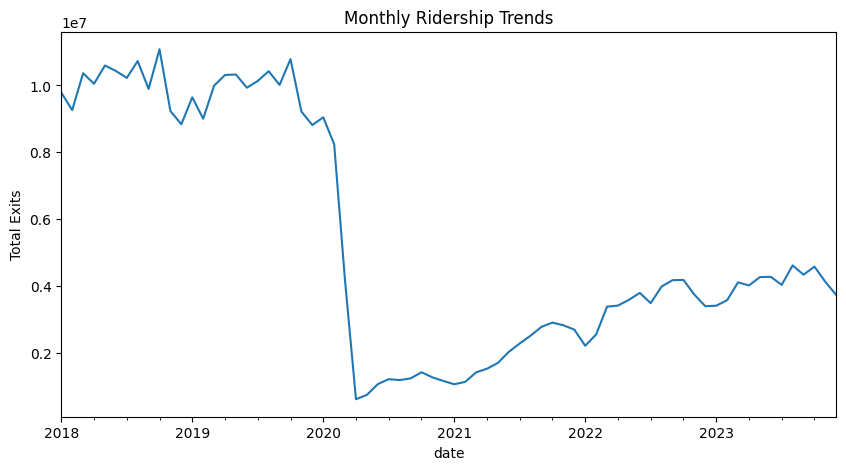

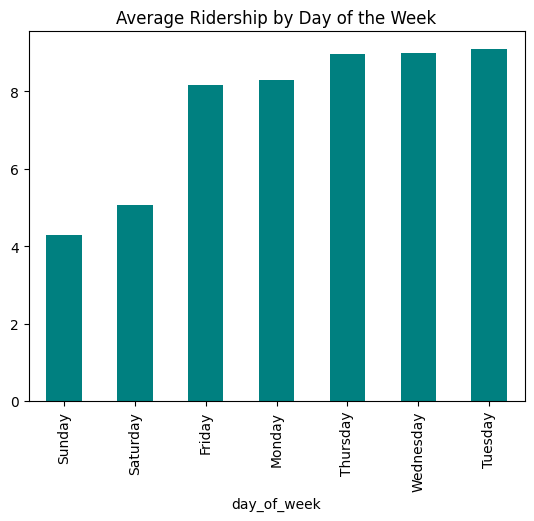

In [12]:
# Monthly ridership trends
monthly_ridership = data.groupby(data['date'].dt.to_period('M'))['Number of Exits'].sum()
monthly_ridership.plot(kind='line', figsize=(10, 5), title='Monthly Ridership Trends')
plt.ylabel('Total Exits')
plt.show()

# Day-wise ridership trends (average per weekday)
daywise_ridership = data.groupby('day_of_week')['Number of Exits'].mean().sort_values()
daywise_ridership.plot(kind='bar', title='Average Ridership by Day of the Week', color='teal')
plt.show()

**Monthly Ridership Trends:**
Pre-2020: Ridership was relatively consistent with some seasonal fluctuations.
COVID-19 Impact: There’s a steep drop around early 2020, indicating the effect of pandemic lockdowns.
Post-COVID: Ridership slowly recovers, but it hasn’t reached pre-pandemic levels, reflecting changes in commuting behavior.

**Day-wise Ridership Trends:**
Weekdays (Monday to Friday): Higher ridership, likely due to work and school commutes.
Weekends (Saturday, Sunday): Lower ridership, as fewer people travel for work.

## Identifying Peak Travel Days

In [13]:
# Top 10 busiest days
busiest_days = data.groupby('date')['Number of Exits'].sum().nlargest(10)
print(busiest_days)

date
2018-06-12    498022
2019-10-02    474741
2019-11-07    460520
2018-09-27    454990
2018-11-08    454461
2018-09-26    454198
2018-09-20    453117
2018-09-12    452151
2018-10-24    449225
2018-04-17    448199
Name: Number of Exits, dtype: int64


## Weather Category vs. Ridership

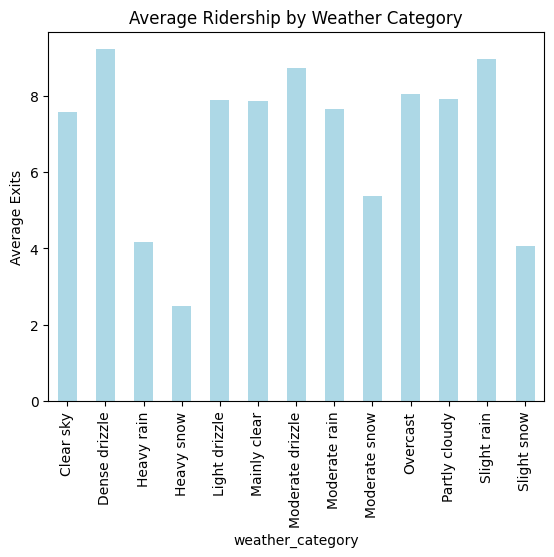

In [14]:
weather_ridership = data.groupby('weather_category')['Number of Exits'].mean()
weather_ridership.plot(kind='bar', color='lightblue', title='Average Ridership by Weather Category')
plt.ylabel('Average Exits')
plt.show()

**Weather Category vs. Ridership:**
Clear skies and light drizzle see higher ridership, suggesting favorable travel conditions.
Heavy rain and snow correspond with lower ridership, which makes sense given the inconvenience for commuters.

## Impact of Weather on Rush Hours (7-9 AM & 4-6 PM)

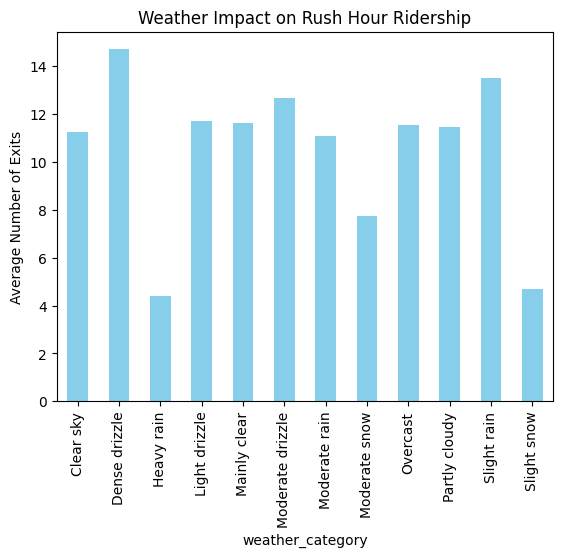

In [15]:
rush_hours = data[data['hour'].isin([7, 8, 9, 16, 17, 18])]
weather_rush_hour = rush_hours.groupby('weather_category')['Number of Exits'].mean()

weather_rush_hour.plot(kind='bar', color='skyblue', title='Weather Impact on Rush Hour Ridership')
plt.ylabel('Average Number of Exits')
plt.show()


**Weather Impact on Rush Hour Ridership:**

Clear skies and moderate drizzle correspond to higher ridership during rush hours.
Heavy rain and snow seem to reduce ridership, indicating that extreme weather discourages travel.
This insight can help in planning resource allocation based on forecasted weather conditions.

## Correlation Matrix

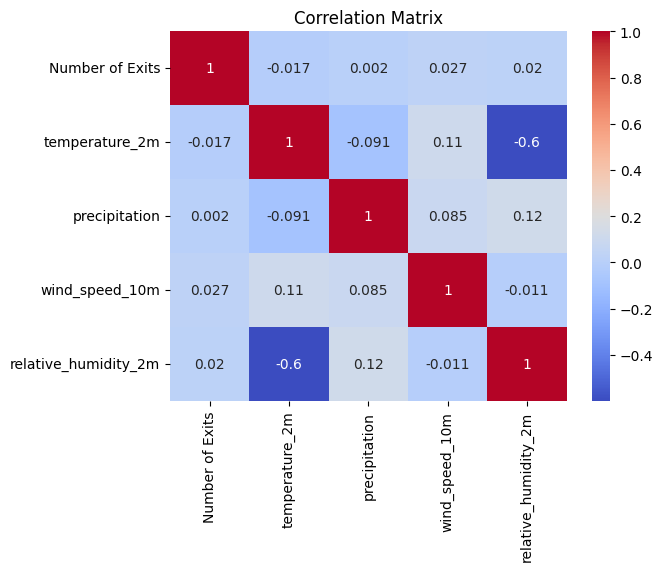

In [16]:
correlation = data[['Number of Exits', 'temperature_2m', 'precipitation', 
                    'wind_speed_10m', 'relative_humidity_2m']].corr()

# Plot a heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix:**
Weak correlations between weather variables and ridership (near zero).
Temperature and humidity are negatively correlated, as expected, but neither strongly impacts ridership directly.

## Seasonal Patterns

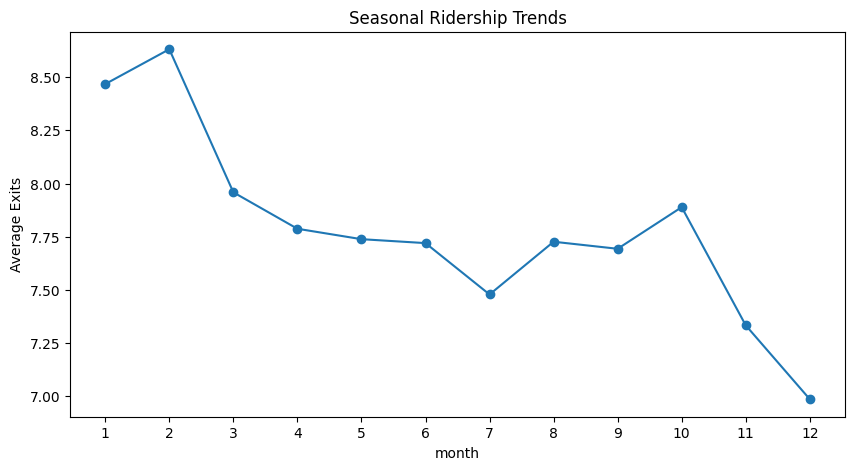

In [17]:
data['month'] = data['date'].dt.month
seasonal_ridership = data.groupby('month')['Number of Exits'].mean()

seasonal_ridership.plot(kind='line', marker='o', title='Seasonal Ridership Trends', figsize=(10, 5))
plt.ylabel('Average Exits')
plt.xticks(range(1, 13))
plt.show()

**Seasonal Patterns:**
Higher ridership in winter months (January–March) with a drop during summer (June–August).
Peaks in January and October may reflect holiday seasons and higher travel activity.

## Average Ridership by Station and County

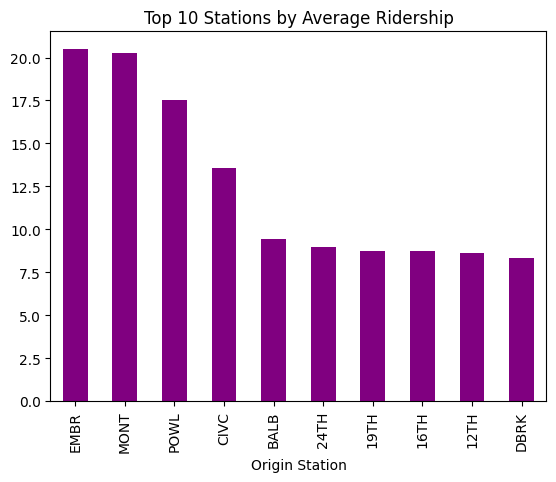

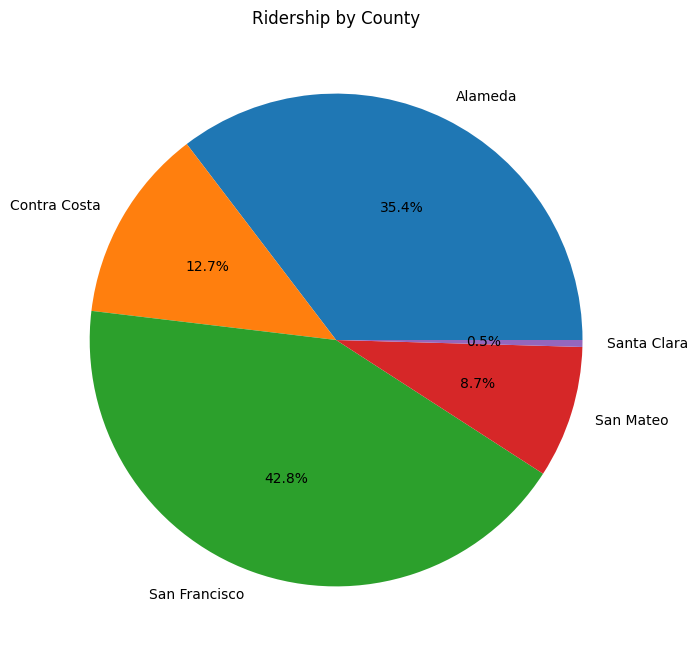

In [18]:
station_ridership = data.groupby('Origin Station')['Number of Exits'].mean().nlargest(10)
station_ridership.plot(kind='bar', title='Top 10 Stations by Average Ridership', color='purple')
plt.show()

county_ridership = data.groupby('county')['Number of Exits'].sum()
county_ridership.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Ridership by County')
plt.ylabel('')
plt.show()

**Top 10 Stations by Average Ridership:**

The busiest stations are concentrated in San Francisco (Embarcadero, Montgomery, Powell, Civic Center).
These stations likely serve major transit hubs or business areas, reflecting heavy commuter traffic.

**Ridership by County:**

San Francisco accounts for 42.8% of total ridership, indicating its significance in the BART network.
Alameda also has a substantial share (35.4%), showing strong commuter demand.
San Mateo and Santa Clara show minimal ridership, suggesting these counties are less central in the BART network.

## Average Ridership by County on Weekdays vs Weekends

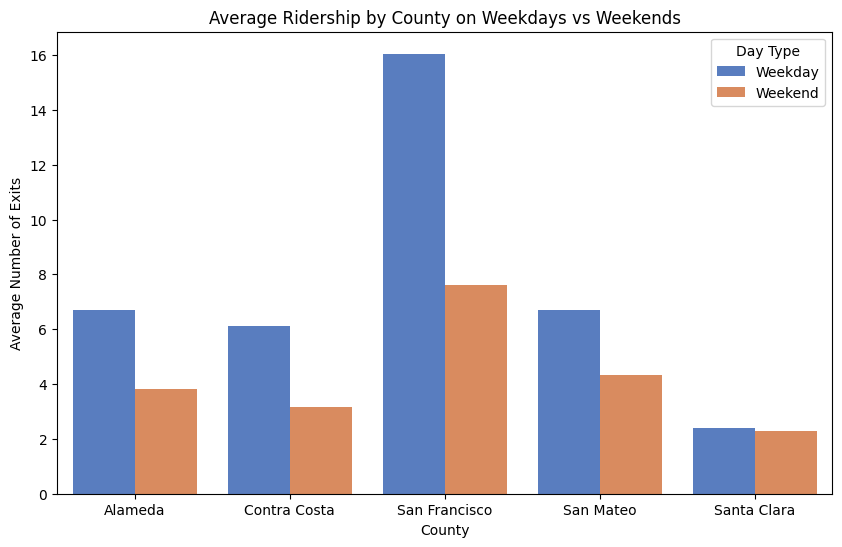

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column to identify weekdays and weekends
data['day_type'] = data['date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Group by county and day_type to get the average ridership
county_ridership = data.groupby(['county', 'day_type'])['Number of Exits'].mean().reset_index()

# Plotting the visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=county_ridership, x='county', y='Number of Exits', hue='day_type', palette='muted')
plt.title('Average Ridership by County on Weekdays vs Weekends')
plt.ylabel('Average Number of Exits')
plt.xlabel('County')
plt.legend(title='Day Type')
plt.show()


**Insights:**

San Francisco has the highest ridership on both weekdays and weekends, with a significant difference between the two, reflecting heavy commuter traffic during weekdays.

Alameda and Contra Costa counties show higher ridership on weekdays, indicating commuter flows into employment hubs.

Santa Clara and San Mateo have relatively lower ridership overall, with minor differences between weekdays and weekends, possibly indicating less commuter dependence on BART.

# Data Preprocessing

In [20]:
# Extract Day of Week and Weekend Indicator
data['day_of_week'] = pd.to_datetime(data['date']).dt.day_name()
data['is_weekend'] = data['day_of_week'].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

# Create Lag Feature (1 day lag for example)
data['ridership_lag_1'] = data['Number of Exits'].shift(24)  # 24-hour lag

# Create 7-day Moving Average of Ridership
data['ridership_7d_avg'] = data['Number of Exits'].rolling(window=7).mean()

# Handle any NaN values generated from shift or rolling operations
data.fillna(0, inplace=True)

# Display the first few rows to verify
print(data.head())


        date  hour Origin Station Destination Station  Number of Exits  Year  \
0 2018-01-01     0           12TH                12TH                3  2018   
1 2018-01-01     0           12TH                16TH                1  2018   
2 2018-01-01     0           12TH                BAYF                1  2018   
3 2018-01-01     0           12TH                CAST                3  2018   
4 2018-01-01     0           12TH                CIVC                2  2018   

    county  temperature_2m  precipitation  weather_code  ...  \
0  Alameda             9.0            0.0             1  ...   
1  Alameda             9.0            0.0             1  ...   
2  Alameda             9.0            0.0             1  ...   
3  Alameda             9.0            0.0             1  ...   
4  Alameda             9.0            0.0             1  ...   

   relative_humidity_2m  weather_category    holiday_name is_holiday  \
0                    95      Mainly clear  New Year's Day     

In [34]:
pd.set_option('display.max_columns', None)

In [35]:
data.head()

,date,hour,Origin Station,Destination Station,Number of Exits,Year,county,temperature_2m,precipitation,weather_code,wind_speed_10m,wind_direction_10m,relative_humidity_2m,weather_category,holiday_name,is_holiday,day_of_week,month,day_type,is_weekend,ridership_lag_1,ridership_7d_avg
0,2018-01-01,0,12TH,12TH,3,2018,Alameda,9.0,0.0,1,6.2,216,95,Mainly clear,New Year's Day,1,Monday,1,Weekday,0,0.0,0.0
1,2018-01-01,0,12TH,16TH,1,2018,Alameda,9.0,0.0,1,6.2,216,95,Mainly clear,New Year's Day,1,Monday,1,Weekday,0,0.0,0.0
2,2018-01-01,0,12TH,BAYF,1,2018,Alameda,9.0,0.0,1,6.2,216,95,Mainly clear,New Year's Day,1,Monday,1,Weekday,0,0.0,0.0
3,2018-01-01,0,12TH,CAST,3,2018,Alameda,9.0,0.0,1,6.2,216,95,Mainly clear,New Year's Day,1,Monday,1,Weekday,0,0.0,0.0
4,2018-01-01,0,12TH,CIVC,2,2018,Alameda,9.0,0.0,1,6.2,216,95,Mainly clear,New Year's Day,1,Monday,1,Weekday,0,0.0,0.0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49687580 entries, 0 to 49687579
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   date                  datetime64[ns]
 1   hour                  int64         
 2   Origin Station        object        
 3   Destination Station   object        
 4   Number of Exits       int64         
 5   Year                  int64         
 6   county                object        
 7   temperature_2m        float64       
 8   precipitation         float64       
 9   weather_code          int64         
 10  wind_speed_10m        float64       
 11  wind_direction_10m    int64         
 12  relative_humidity_2m  int64         
 13  weather_category      object        
 14  holiday_name          object        
 15  is_holiday            int64         
 16  day_of_week           object        
 17  month                 int32         
 18  day_type              object        
 19

In [21]:
# Encode Categorical Variables
encoder = LabelEncoder()

data['Origin Station'] = encoder.fit_transform(data['Origin Station'])
data['Destination Station'] = encoder.fit_transform(data['Destination Station'])
data['weather_category'] = encoder.fit_transform(data['weather_category'])
data['day_of_week'] = encoder.fit_transform(data['day_of_week'])
data['county'] = encoder.fit_transform(data['county'])

In [38]:
# Select features and target variable
features = ['hour', 'Origin Station', 'Destination Station', 'temperature_2m',
            'precipitation', 'wind_speed_10m', 'relative_humidity_2m',
            'weather_category', 'is_holiday', 'is_weekend']

X = data[features].values
y = data['Number of Exits'].values

In [39]:
# Scale Data

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

In [40]:
# Reshaping data for LSTM, as it expects data in the shape (samples, time_steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

In [41]:
# Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Build and Train the LSTM Model

In [42]:
# Defining the LSTM Model

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

W0000 00:00:1730180289.867942      23 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [43]:
# Training the model with EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, 
                    validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 533s 856us/step - loss: 3.7184e-04 - val_loss: 3.6465e-04
Epoch 2/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 556s 894us/step - loss: 3.6747e-04 - val_loss: 3.6527e-04
Epoch 3/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 549s 883us/step - loss: 3.6736e-04 - val_loss: 3.6406e-04
Epoch 4/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 520s 836us/step - loss: 3.6356e-04 - val_loss: 3.6139e-04
Epoch 5/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 542s 871us/step - loss: 3.6518e-04 - val_loss: 3.6176e-04
Epoch 6/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 538s 864us/step - loss: 3.6369e-04 - val_loss: 3.6161e-04
Epoch 7/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 513s 825us/step - loss: 3.6487e-04 - val_loss: 3.6088e-04
Epoch 8/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 503s 809us/step - loss: 3.6235e-04 - val_loss: 3.6018e-04
Epoch 9/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 530s 851us/step - loss: 3.6383e-04 - val_loss: 3.5834e-04
Epoch 10/50
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 540s 868us/step -

In [44]:
# Evaluate the model performance on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

310548/310548 ━━━━━━━━━━━━━━━━━━━━ 138s 445us/step - loss: 3.2781e-04
Test Loss: 0.00032859406201168895


In [45]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and target values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Display first 10 predictions vs actual values
for i in range(10):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i][0]:.2f}")

310548/310548 ━━━━━━━━━━━━━━━━━━━━ 143s 460us/step
Predicted: 4.42, Actual: 2.00
Predicted: 13.28, Actual: 22.00
Predicted: 5.60, Actual: 1.00
Predicted: 3.94, Actual: 2.00
Predicted: 4.47, Actual: 1.00
Predicted: 7.45, Actual: 5.00
Predicted: 3.01, Actual: 1.00
Predicted: 7.71, Actual: 40.00
Predicted: 33.88, Actual: 57.00
Predicted: 8.77, Actual: 3.00


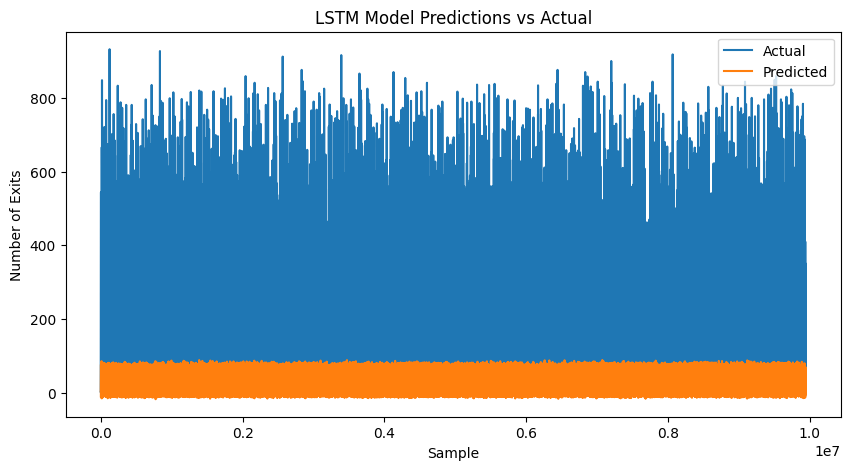

In [46]:
import matplotlib.pyplot as plt

# Plot predictions vs actual values
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('LSTM Model Predictions vs Actual')
plt.xlabel('Sample')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()

# Evaluation Metrics

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate RMSE, MAE, and MAPE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")


310548/310548 ━━━━━━━━━━━━━━━━━━━━ 144s 465us/step
RMSE: 23.99991787507573
MAE: 7.777320195953595
MAPE: 99.75854101795483%


# Visualizing Actual vs Predicted Trends

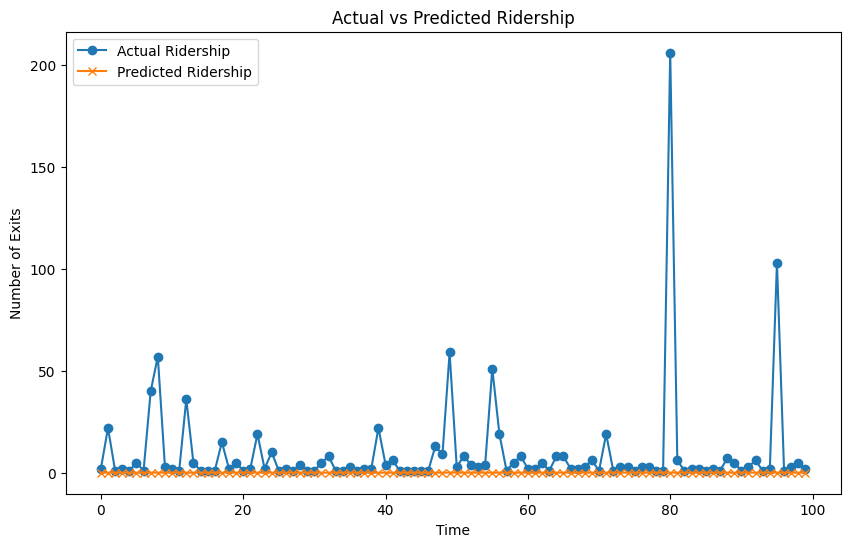

In [48]:
# Plot actual vs predicted ridership
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual Ridership', marker='o')
plt.plot(y_pred[:100], label='Predicted Ridership', marker='x')

plt.title('Actual vs Predicted Ridership')
plt.xlabel('Time')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()

In [49]:
# Save the trained LSTM model
model.save('lstm_model.h5')
print("Model saved as 'lstm_model.h5'")

Model saved as 'lstm_model.h5'


# Updating parameters for LSTM

In [54]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Encode Categorical Variables
encoder = LabelEncoder()

categorical_columns = ['Origin Station', 'Destination Station', 'weather_category',
                       'day_of_week', 'county']

for col in categorical_columns:
    data[col] = encoder.fit_transform(data[col])

# Select features and target variable
# features = ['hour', 'Origin Station', 'Destination Station', 'temperature_2m',
#            'precipitation', 'wind_speed_10m', 'relative_humidity_2m',
#            'weather_category', 'is_holiday', 'is_weekend']

features = ['hour', 'Origin Station', 'Destination Station', 'weather_category', 'is_holiday', 'is_weekend']

X = data[features].values
y = data['Number of Exits'].values

# Scale Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape data for LSTM input (samples, time_steps, features)
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, 
                                                    test_size=0.2, random_state=42)

print("Training and test data shapes:")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")


Training and test data shapes:
X_train: (39750064, 1, 6), X_test: (9937516, 1, 6)
y_train: (39750064, 1), y_test: (9937516, 1)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM Model
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output Layer for regression

# Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the Model
history = model.fit(X_train, y_train, epochs=4, batch_size=64, 
                    validation_data=(X_test, y_test), verbose=1)

Epoch 1/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 804s 1ms/step - loss: 3.7187e-04 - val_loss: 3.6381e-04
Epoch 2/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 928s 1ms/step - loss: 3.6420e-04 - val_loss: 3.5993e-04
Epoch 3/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 897s 1ms/step - loss: 3.5540e-04 - val_loss: 3.2831e-04
Epoch 4/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 828s 1ms/step - loss: 3.1250e-04 - val_loss: 3.3572e-04


In [56]:
# Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make Predictions
y_pred = model.predict(X_test)

# Inverse Transform the Predictions and Target Values
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Display First 10 Predictions vs Actual Values
for i in range(10):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i][0]:.2f}")

310548/310548 ━━━━━━━━━━━━━━━━━━━━ 182s 587us/step - loss: 3.3520e-04
Test Loss: 0.00033571827225387096
310548/310548 ━━━━━━━━━━━━━━━━━━━━ 205s 659us/step
Predicted: 4.17, Actual: 2.00
Predicted: 14.23, Actual: 22.00
Predicted: 0.96, Actual: 1.00
Predicted: 4.42, Actual: 2.00
Predicted: 1.74, Actual: 1.00
Predicted: 1.71, Actual: 5.00
Predicted: 0.83, Actual: 1.00
Predicted: 3.86, Actual: 40.00
Predicted: 3.24, Actual: 57.00
Predicted: 4.24, Actual: 3.00


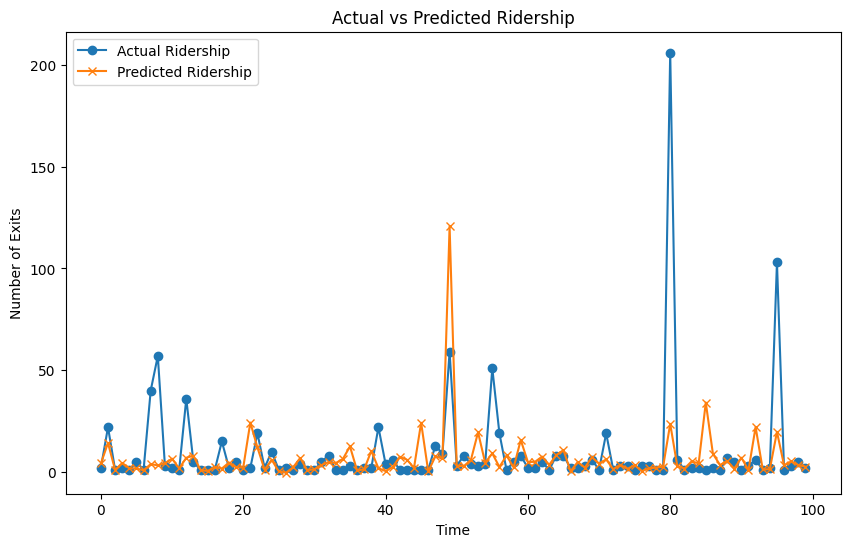

In [57]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted Values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual Ridership', marker='o')
plt.plot(y_pred[:100], label='Predicted Ridership', marker='x')
plt.title('Actual vs Predicted Ridership')
plt.xlabel('Time')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MAE, and MAPE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 21.327527365885608
MAE: 7.446289962368288
MAPE: 190.07750389086192%


The performance metrics you provided offer insights into how well your LSTM model is predicting ridership:

RMSE (Root Mean Squared Error): 21.33 - Indicates the average magnitude of error. A higher RMSE suggests your model’s predictions deviate significantly from actual values.

MAE (Mean Absolute Error): 7.45 - Represents the average absolute difference between predicted and actual values. It's more interpretable as it is in the same units as the target variable.

MAPE (Mean Absolute Percentage Error): 190% - A very high value, suggesting that your model’s predictions are substantially off, especially on smaller values of ridership.

The extremely high MAPE (over 100%) indicates the model struggles with accuracy, particularly for lower ridership values. This could point to overfitting, noise in the data, or that the impact of events like the COVID pandemic is complicating the learning process.

## Considering additional features

In [22]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [23]:
# 3. Select Features and Target Variable
features = [
    'hour', 'day_of_week', 'month', 'year', 'Origin Station', 
    'Destination Station', 'temperature_2m', 'precipitation', 
    'wind_speed_10m', 'relative_humidity_2m', 'weather_category', 
    'is_holiday', 'is_weekend', 'county'
]
X = data[features].values
y = data['Number of Exits'].values

In [24]:
# 4. Scale Data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# 5. Reshape Data for LSTM
X_scaled = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# 6. Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)


In [25]:
# 7. Build the LSTM Model
model = Sequential()
model.add(LSTM(64, activation='tanh', return_sequences=True, input_shape=(1, X_train.shape[2])))
model.add(Dropout(0.2))  # To prevent overfitting
model.add(LSTM(32, activation='tanh', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))  # Output layer for regression

# 8. Compile the Model
model.compile(optimizer='adam', loss='mean_squared_error')

W0000 00:00:1730237442.398459   12835 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [27]:
# 9. Train the Model
history = model.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 878s 1ms/step - loss: 3.2120e-04 - val_loss: 2.7186e-04
Epoch 2/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 898s 1ms/step - loss: 2.8035e-04 - val_loss: 2.6110e-04
Epoch 3/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 888s 1ms/step - loss: 2.6257e-04 - val_loss: 2.4924e-04
Epoch 4/4
621095/621095 ━━━━━━━━━━━━━━━━━━━━ 895s 1ms/step - loss: 2.4710e-04 - val_loss: 2.5279e-04


In [28]:
# 10. Evaluate the Model
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

310548/310548 ━━━━━━━━━━━━━━━━━━━━ 174s 560us/step - loss: 2.5257e-04
Test Loss: 0.0002527913311496377


In [29]:
# 11. Make Predictions on Test Set
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

310548/310548 ━━━━━━━━━━━━━━━━━━━━ 183s 589us/step


In [30]:
# 12. Display Actual vs Predicted
for i in range(10):
    print(f"Predicted: {y_pred[i][0]:.2f}, Actual: {y_test[i][0]:.2f}")

Predicted: 8.69, Actual: 2.00
Predicted: 9.20, Actual: 22.00
Predicted: 3.87, Actual: 1.00
Predicted: 11.27, Actual: 2.00
Predicted: 3.59, Actual: 1.00
Predicted: 4.96, Actual: 5.00
Predicted: 4.35, Actual: 1.00
Predicted: 19.98, Actual: 40.00
Predicted: 53.60, Actual: 57.00
Predicted: 4.58, Actual: 3.00


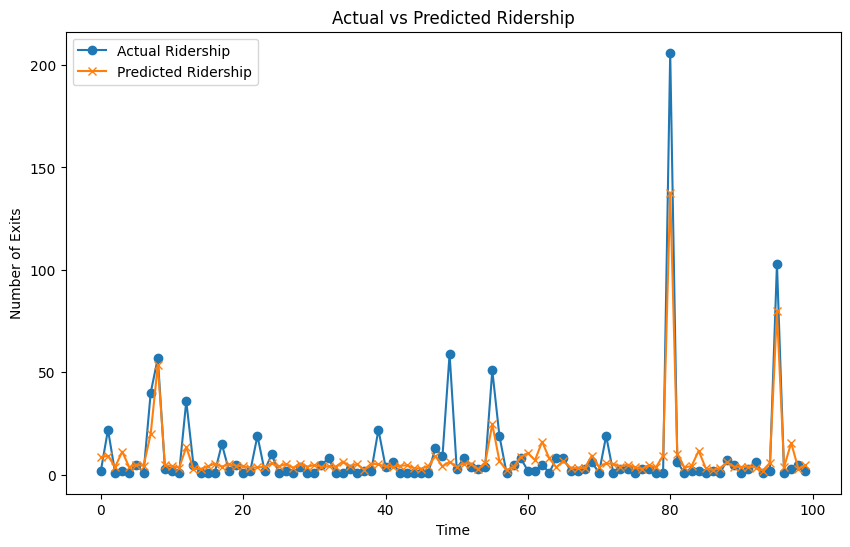

In [31]:
# 13. Plot Predictions vs Actual Values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual Ridership', marker='o')
plt.plot(y_pred[:100], label='Predicted Ridership', marker='x')
plt.title('Actual vs Predicted Ridership')
plt.xlabel('Time')
plt.ylabel('Number of Exits')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE, MAE, and MAPE
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)  # MAE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100  # MAPE

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"MAPE: {mape}%")

RMSE: 18.506904220469806
MAE: 5.931433007172567
MAPE: 168.305269858525%


# ARIMA

In [9]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

# Define parameter range
p = range(1, 6)  # AR terms
d = range(0, 2)  # Differencing terms
q = range(0, 3)  # MA terms

# Grid search for best parameters
best_rmse = float('inf')
best_order = None

for params in itertools.product(p, d, q):
    try:
        model = ARIMA(train, order=params)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        rmse = np.sqrt(mean_squared_error(test, forecast))
        print(f'ARIMA{params} RMSE: {rmse}')

        if rmse < best_rmse:
            best_rmse = rmse
            best_order = params
    except:
        continue

print(f'Best ARIMA order: {best_order} with RMSE: {best_rmse}')


ARIMA(1, 0, 0) RMSE: 70678.85128294217
ARIMA(1, 0, 1) RMSE: 70736.17192898116
ARIMA(1, 0, 2) RMSE: 46838.63121487516
ARIMA(1, 1, 0) RMSE: 59866.992904984996
ARIMA(1, 1, 1) RMSE: 63197.181705537696
ARIMA(1, 1, 2) RMSE: 44033.11148503172
ARIMA(2, 0, 0) RMSE: 70717.37995195262
ARIMA(2, 0, 1) RMSE: 70732.06887630172
ARIMA(2, 0, 2) RMSE: 46709.24588652544
ARIMA(2, 1, 0) RMSE: 53617.45274845611
ARIMA(2, 1, 1) RMSE: 44048.10763063735
ARIMA(2, 1, 2) RMSE: 43262.62023402596
ARIMA(3, 0, 0) RMSE: 70510.08575711463
ARIMA(3, 0, 1) RMSE: 47503.709681473665
ARIMA(3, 0, 2) RMSE: 69939.20321237373
ARIMA(3, 1, 0) RMSE: 50696.398579101835
ARIMA(3, 1, 1) RMSE: 44007.78705103997
ARIMA(3, 1, 2) RMSE: 44082.688290930804
ARIMA(4, 0, 0) RMSE: 70464.27159097808
ARIMA(4, 0, 1) RMSE: 70545.38213516481
ARIMA(4, 0, 2) RMSE: 70022.42913500489
ARIMA(4, 1, 0) RMSE: 45388.70731624095
ARIMA(4, 1, 1) RMSE: 43452.86529333097
ARIMA(4, 1, 2) RMSE: 30633.641745027846
ARIMA(5, 0, 0) RMSE: 69465.54234488461
ARIMA(5, 0, 1) RMSE

In [10]:
from statsmodels.tsa.arima.model import ARIMA

ar_data = pd.read_csv('ridership_and_weather_data_combined_2018_to_2023.csv', parse_dates=['date'])
daily_data = ar_data.groupby('date')['Number of Exits'].sum()

# Split data into train and test sets (e.g., 80-20 split)
train_size = int(len(daily_data) * 0.8)
train, test = daily_data[:train_size], daily_data[train_size:]

# Build and train the ARIMA model
model = ARIMA(train, order=(4, 1, 2))  # Adjust p, d, q based on your data
model_fit = model.fit()

In [11]:
# Print summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Number of Exits   No. Observations:                 1749
Model:                 ARIMA(4, 1, 2)   Log Likelihood              -21534.851
Date:                Tue, 29 Oct 2024   AIC                          43083.702
Time:                        22:59:08   BIC                          43121.966
Sample:                             0   HQIC                         43097.848
                               - 1749                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7361      0.011     68.217      0.000       0.715       0.757
ar.L2         -1.0665      0.016    -68.379      0.000      -1.097      -1.036
ar.L3          0.3637      0.015     24.363      0.0

In [12]:
# Forecast on the test data
forecast = model_fit.forecast(steps=len(test))

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'RMSE: {rmse}')

RMSE: 30633.641745027846


In [18]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test, forecast)
mape = np.mean(np.abs((test - forecast) / test)) * 100
print(f'RMSE: {rmse}')
print(f"MAE: {mae}")

RMSE: 30633.641745027846
MAE: 23099.1610616807


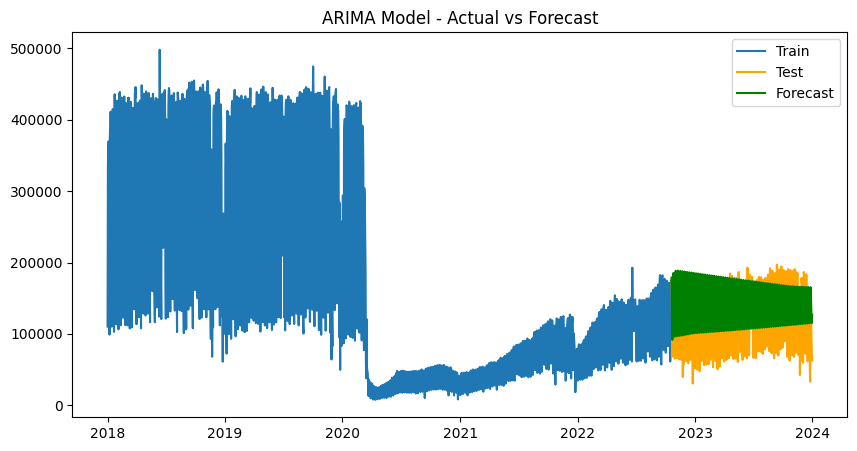

In [13]:
# Plot the predictions vs actual data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, forecast, label='Forecast', color='green')
plt.title('ARIMA Model - Actual vs Forecast')
plt.legend()
plt.show()